In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from torch.autograd import Variable
from torch.utils.data import Dataset,DataLoader,TensorDataset
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.autograd import Variable
from torch.utils.data import Dataset,DataLoader,TensorDataset
from sklearn.preprocessing import MinMaxScaler
from torch import nn
import seaborn as sns

In [2]:
dfi = pd.read_csv('./Data/Weather/madrid.csv')
dfi

Unnamed: 0                 time  temperature  wind_speed  \
0               0  2019-01-01 00:59:59          3.1        0.65   
1               1  2019-01-01 01:59:59          2.9        0.95   
2               2  2019-01-01 02:59:59          3.1        0.87   
3               3  2019-01-01 03:59:59          1.9        0.73   
4               4  2019-01-01 04:59:59          0.7        0.57   
...           ...                  ...          ...         ...   
27019         715  2022-01-31 19:59:59         10.1        2.65   
27020         716  2022-01-31 20:59:59          8.2        3.82   
27021         717  2022-01-31 21:59:59          7.2        2.38   
27022         718  2022-01-31 22:59:59          5.6        3.92   
27023         719  2022-01-31 23:59:59          4.9        3.95   

       wind_direction  humidity  barometric_pressure  solar_radiation  \
0                64.0      50.0                949.0              0.0   
1                32.0      49.0                949.0              0.0   
2                62.0      46.0                949.0              0.0   
3                75.0      51.0                949.0              0.0   
4                53.0      56.0                949.0              0.0   
...               ...       ...                  ...              ...   
27019            47.0      17.0                946.0              0.0   
27020            21.0      25.0                947.0              0.0   
27021            29.0      31.0                947.0              0.0   
27022            58.0      41.0                947.0              0.0   
27023            11.0      47.0                948.0              0.0   

       precipitation  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
...              ...  
27019            0.0  
27020            0.0  
27021            0.0  
27022            0.0  
27023            0.0  

[27024 rows x 9 columns]

In [3]:
df = dfi.loc[dfi['time'] < '2019-08-01']
df

Unnamed: 0                 time  temperature  wind_speed  \
0              0  2019-01-01 00:59:59          3.1        0.65   
1              1  2019-01-01 01:59:59          2.9        0.95   
2              2  2019-01-01 02:59:59          3.1        0.87   
3              3  2019-01-01 03:59:59          1.9        0.73   
4              4  2019-01-01 04:59:59          0.7        0.57   
...          ...                  ...          ...         ...   
5083         739  2019-07-31 19:59:59         29.3        2.88   
5084         740  2019-07-31 20:59:59         27.7        5.18   
5085         741  2019-07-31 21:59:59         25.7        5.98   
5086         742  2019-07-31 22:59:59         24.5        5.62   
5087         743  2019-07-31 23:59:59         23.4        4.77   

      wind_direction  humidity  barometric_pressure  solar_radiation  \
0               64.0      50.0                949.0              0.0   
1               32.0      49.0                949.0              0.0   
2               62.0      46.0                949.0              0.0   
3               75.0      51.0                949.0              0.0   
4               53.0      56.0                949.0              0.0   
...              ...       ...                  ...              ...   
5083           122.0      25.0                937.0            230.0   
5084           106.0      35.0                937.0             29.0   
5085           122.0      43.0                937.0              1.0   
5086           133.0      47.0                938.0              0.0   
5087           142.0      50.0                938.0              0.0   

      precipitation  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
5083            0.0  
5084            0.0  
5085            0.0  
5086            0.0  
5087            0.0  

[5088 rows x 9 columns]

In [4]:
df = df[['time','barometric_pressure','wind_speed','humidity','temperature']]
df = df.set_index('time')
df = df.dropna()
df

barometric_pressure  wind_speed  humidity  temperature
time                                                                       
2019-01-01 00:59:59                949.0        0.65      50.0          3.1
2019-01-01 01:59:59                949.0        0.95      49.0          2.9
2019-01-01 02:59:59                949.0        0.87      46.0          3.1
2019-01-01 03:59:59                949.0        0.73      51.0          1.9
2019-01-01 04:59:59                949.0        0.57      56.0          0.7
...                                  ...         ...       ...          ...
2019-07-31 19:59:59                937.0        2.88      25.0         29.3
2019-07-31 20:59:59                937.0        5.18      35.0         27.7
2019-07-31 21:59:59                937.0        5.98      43.0         25.7
2019-07-31 22:59:59                938.0        5.62      47.0         24.5
2019-07-31 23:59:59                938.0        4.77      50.0         23.4

[5088 rows x 4 columns]

# **STATISTICAL TESTS**

<Axes: xlabel='time'>

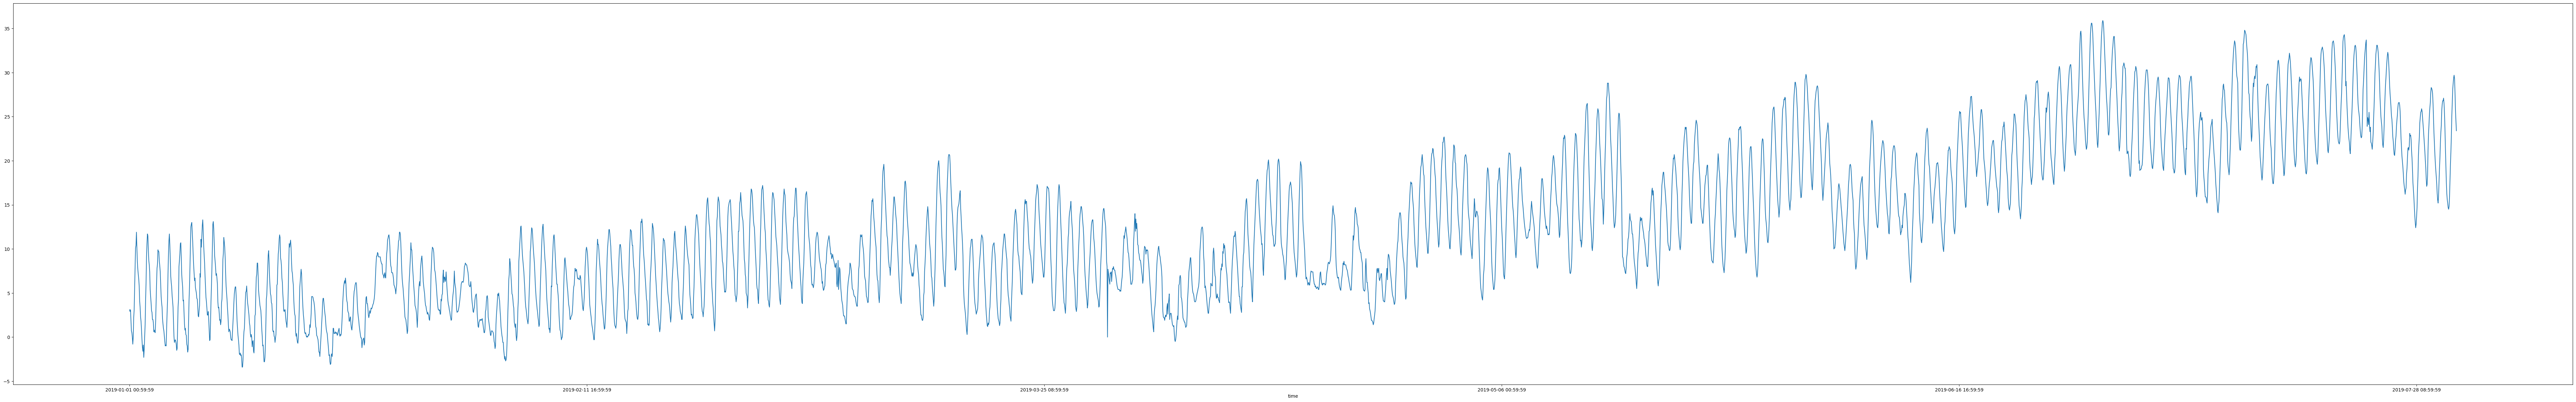

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 100, 15
df['temperature'].plot()

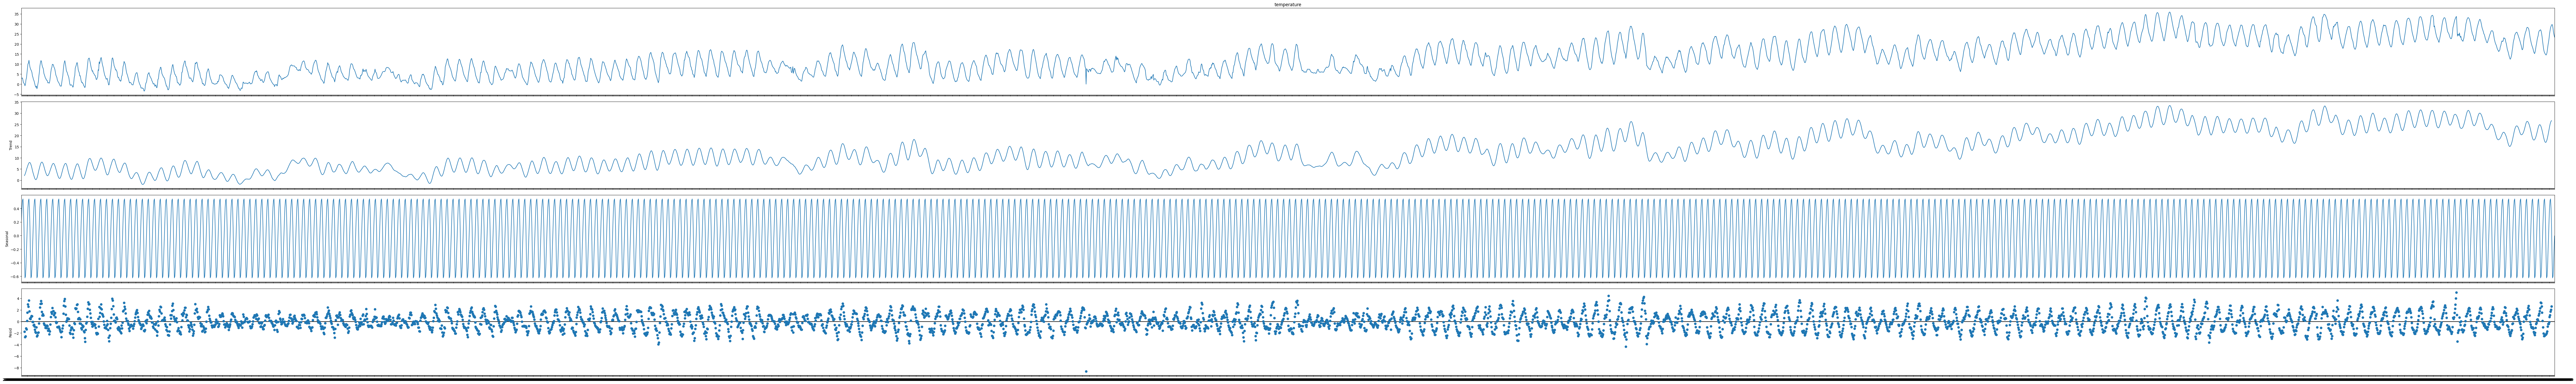

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['temperature'], model='additive', period=12) 
result.plot()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

def adf_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [8]:
adf_test(df['temperature'])

ADF Test Statistic : -2.647797294027691
p-value : 0.08351533294988445
#Lags Used : 31
Number of Observations : 5056
weak evidence against null hypothesis,indicating it is non-stationary 


<Figure size 1200x600 with 0 Axes>

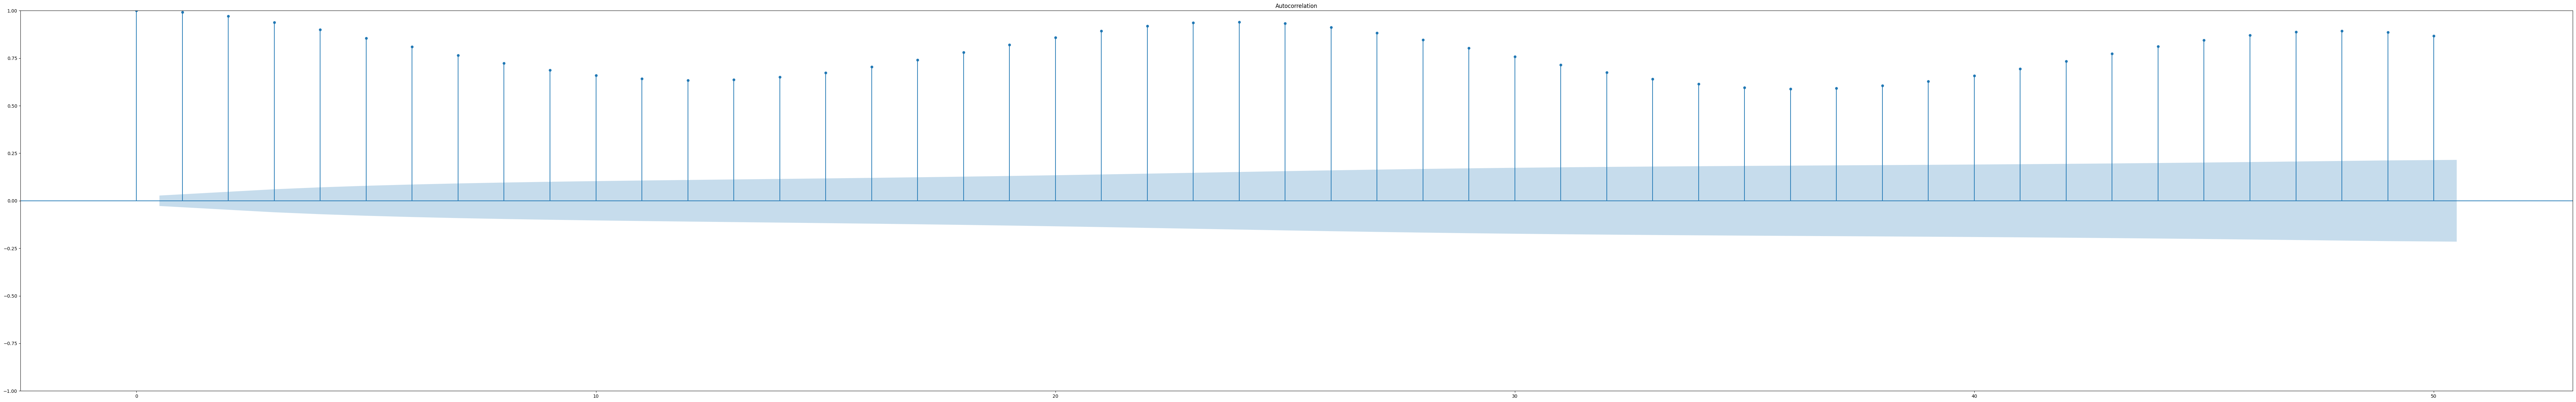

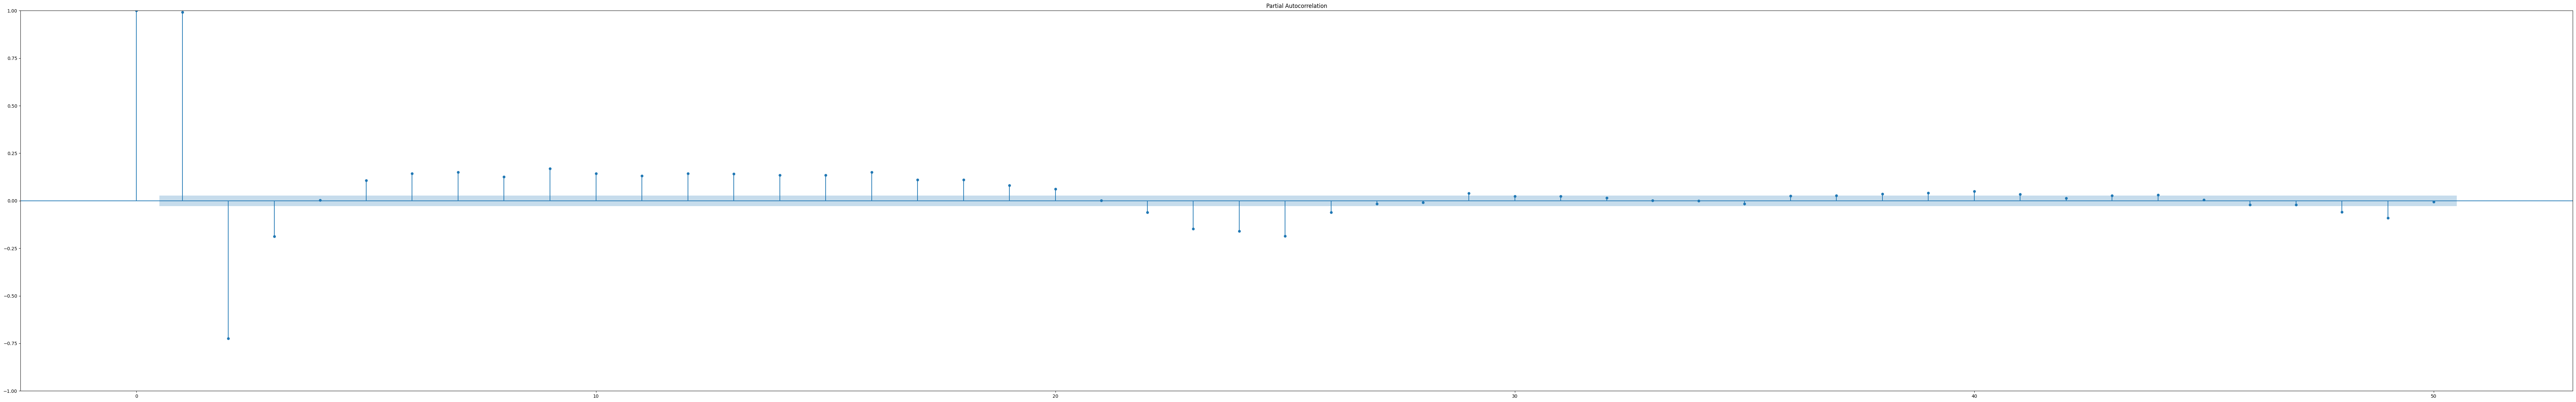

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(df['temperature'], lags=50) # p = 
plot_pacf(df['temperature'], lags=50) # q = 
plt.show()

In [10]:
df['temperature'].diff()

time
2019-01-01 00:59:59    NaN
2019-01-01 01:59:59   -0.2
2019-01-01 02:59:59    0.2
2019-01-01 03:59:59   -1.2
2019-01-01 04:59:59   -1.2
                      ... 
2019-07-31 19:59:59   -0.4
2019-07-31 20:59:59   -1.6
2019-07-31 21:59:59   -2.0
2019-07-31 22:59:59   -1.2
2019-07-31 23:59:59   -1.1
Name: temperature, Length: 5088, dtype: float64

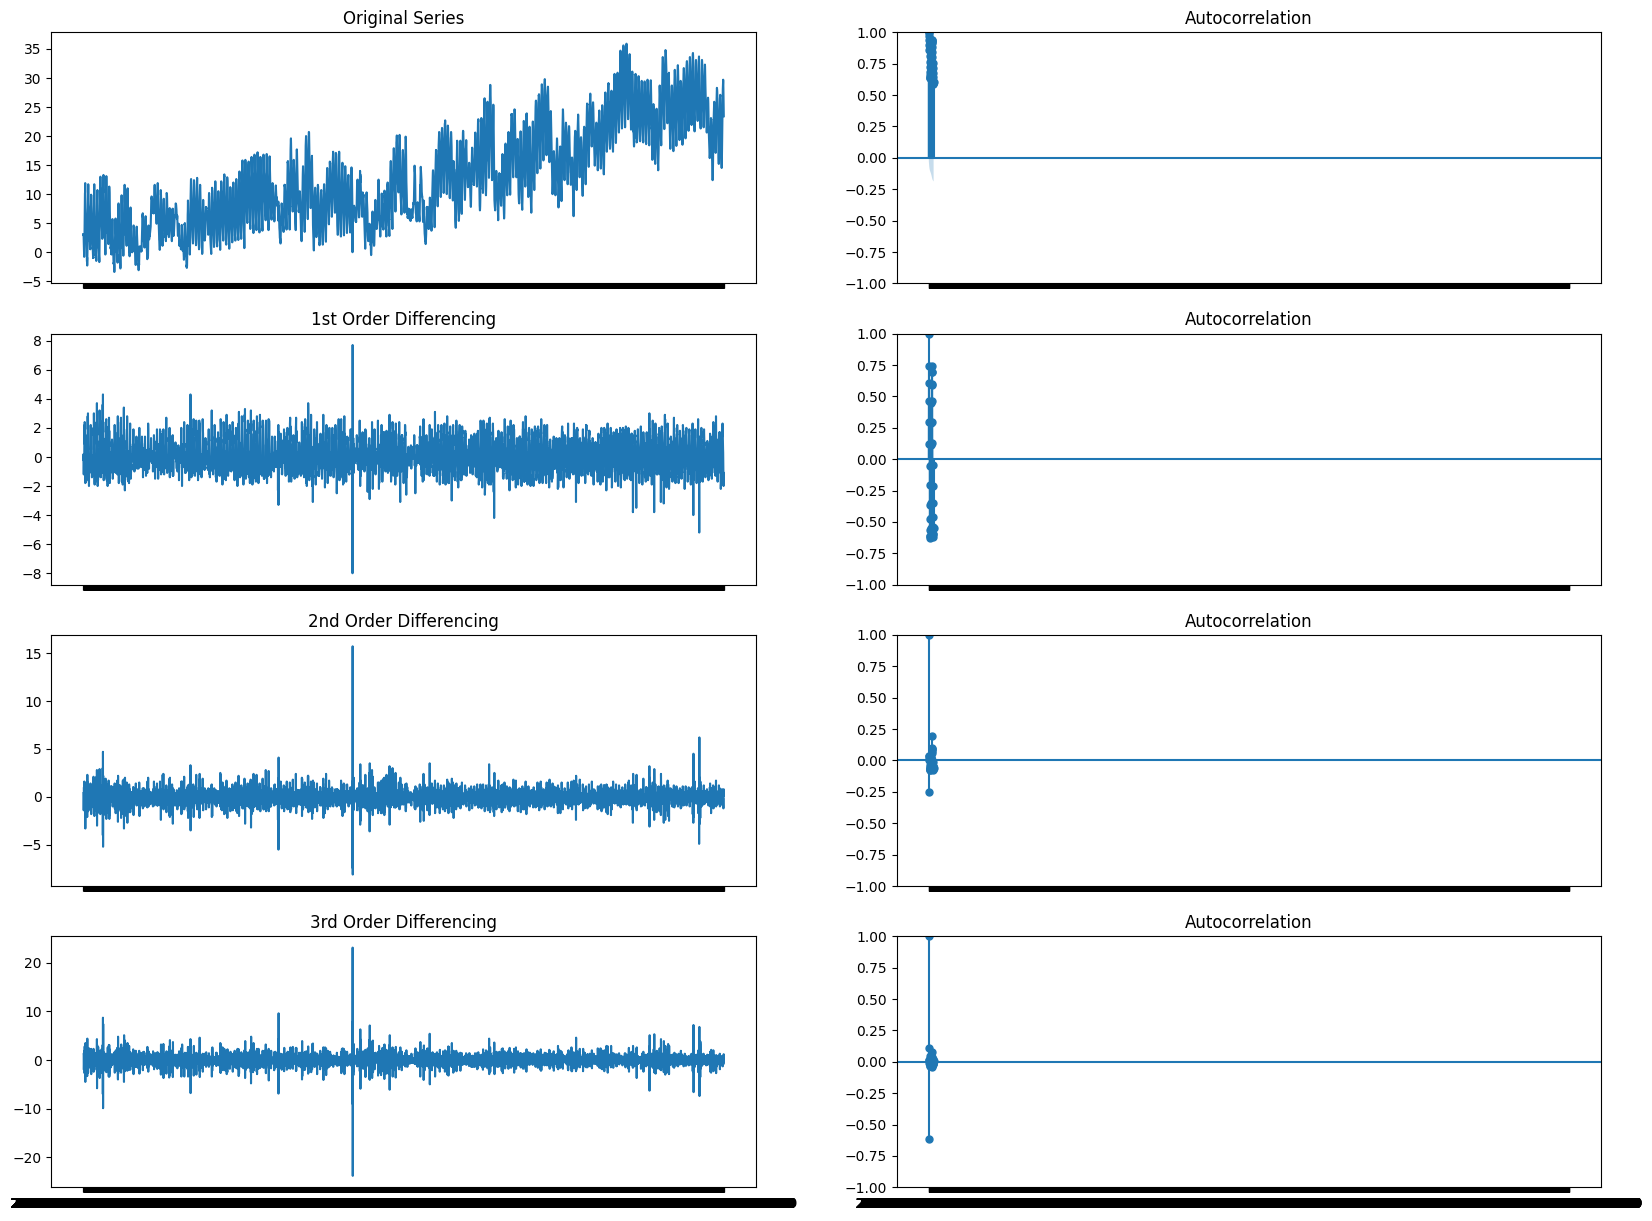

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(20,15)})


# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(df['temperature']); axes[0, 0].set_title('Original Series')
plot_acf(df['temperature'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['temperature'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['temperature'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['temperature'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['temperature'].diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(df['temperature'].diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(df['temperature'].diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

# **ARIMA MODEL**

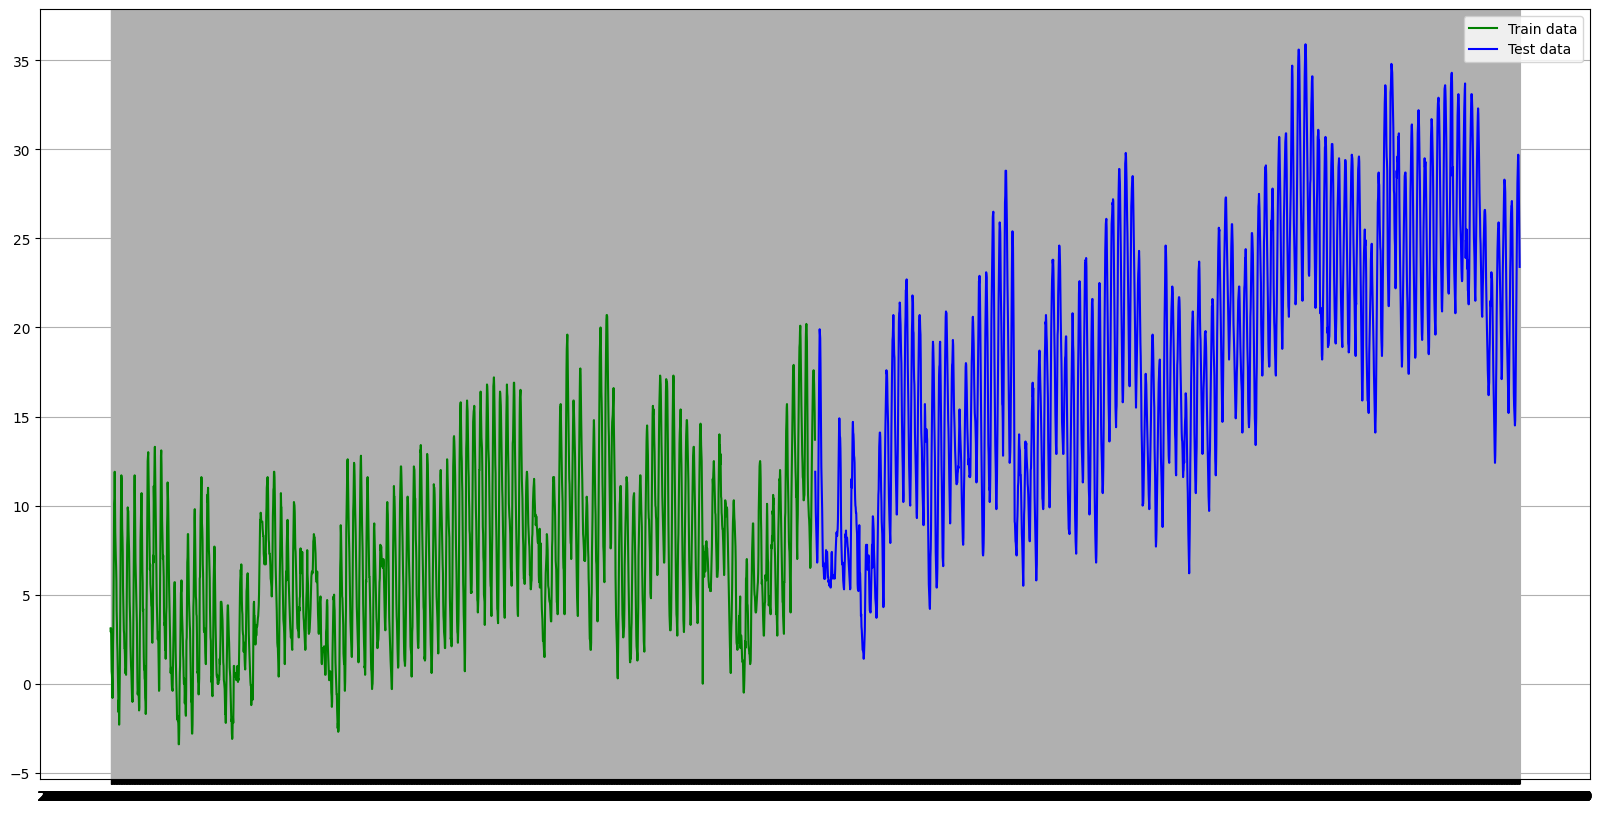

In [12]:
train_data, test_data = df[:int(len(df)*0.5)], df[int(len(df)*0.5):]
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(train_data['temperature'], 'green', label='Train data')
plt.plot(test_data['temperature'], 'blue', label='Test data')
plt.legend()

In [13]:
'''import itertools
import warnings
warnings.filterwarnings("ignore")
q_arima = range(0,13)
d_arima = range(0,3)
p_arima = range(0, 13)
AIC_arima = []
ARIMAX_model = []
pdqs = [(x[0], x[1], x[2]) for x in list(itertools.product(p_arima, d_arima, q_arima))]

for pdq in pdqs:
    try:
        mod = ARIMA(train_data['temperature'],order=pdq)

        results = mod.fit()
        print('ARIMAX{} - AIC:{}'.format(pdq, results.aic), end='\r')
        AIC_arima.append(results.aic)
        ARIMAX_model.append([(1,1,0), pdq])
    except:
            continue
    
print('The smallest AIC is {} for model ARIMAX{}'.format(min(AIC_arima),ARIMAX_model[AIC_arima.index(min(AIC_arima))][1]))
order_a = ARIMAX_model[AIC_arima.index(min(AIC_arima))][1]'''

'import itertools\nimport warnings\nwarnings.filterwarnings("ignore")\nq_arima = range(0,13)\nd_arima = range(0,3)\np_arima = range(0, 13)\nAIC_arima = []\nARIMAX_model = []\npdqs = [(x[0], x[1], x[2]) for x in list(itertools.product(p_arima, d_arima, q_arima))]\n\nfor pdq in pdqs:\n    try:\n        mod = ARIMA(train_data[\'temperature\'],order=pdq)\n\n        results = mod.fit()\n        print(\'ARIMAX{} - AIC:{}\'.format(pdq, results.aic), end=\'\r\')\n        AIC_arima.append(results.aic)\n        ARIMAX_model.append([(1,1,0), pdq])\n    except:\n            continue\n    \nprint(\'The smallest AIC is {} for model ARIMAX{}\'.format(min(AIC_arima),ARIMAX_model[AIC_arima.index(min(AIC_arima))][1]))\norder_a = ARIMAX_model[AIC_arima.index(min(AIC_arima))][1]'

In [14]:
order_a = (12,2,4)

In [15]:
train, test = train_data['temperature'], test_data['temperature']

model = ARIMA(train, order=order_a)
result = model.fit()

forecast_a = result.get_forecast(steps=len(test))
predicted_mean = forecast_a.predicted_mean

mse = mean_squared_error(test, predicted_mean)
rmse = math.sqrt(mse)
print(f'Mean Squared Error: {mse}')

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Squared Error: 30.433162559738044


In [16]:
print(mse)
print(rmse)

30.433162559738044
5.516626012313871


In [17]:
test

time
2019-04-17 00:59:59    11.9
2019-04-17 01:59:59    10.6
2019-04-17 02:59:59     9.6
2019-04-17 03:59:59     9.1
2019-04-17 04:59:59     8.6
                       ... 
2019-07-31 19:59:59    29.3
2019-07-31 20:59:59    27.7
2019-07-31 21:59:59    25.7
2019-07-31 22:59:59    24.5
2019-07-31 23:59:59    23.4
Name: temperature, Length: 2544, dtype: float64

In [18]:
predicted_mean

2019-04-17 00:59:59    12.594381
2019-04-17 01:59:59    11.695846
2019-04-17 02:59:59    11.046938
2019-04-17 03:59:59    10.539594
2019-04-17 04:59:59    10.347066
                         ...    
2019-07-31 19:59:59    23.917883
2019-07-31 20:59:59    23.922189
2019-07-31 21:59:59    23.926494
2019-07-31 22:59:59    23.930800
2019-07-31 23:59:59    23.935105
Freq: H, Name: predicted_mean, Length: 2544, dtype: float64

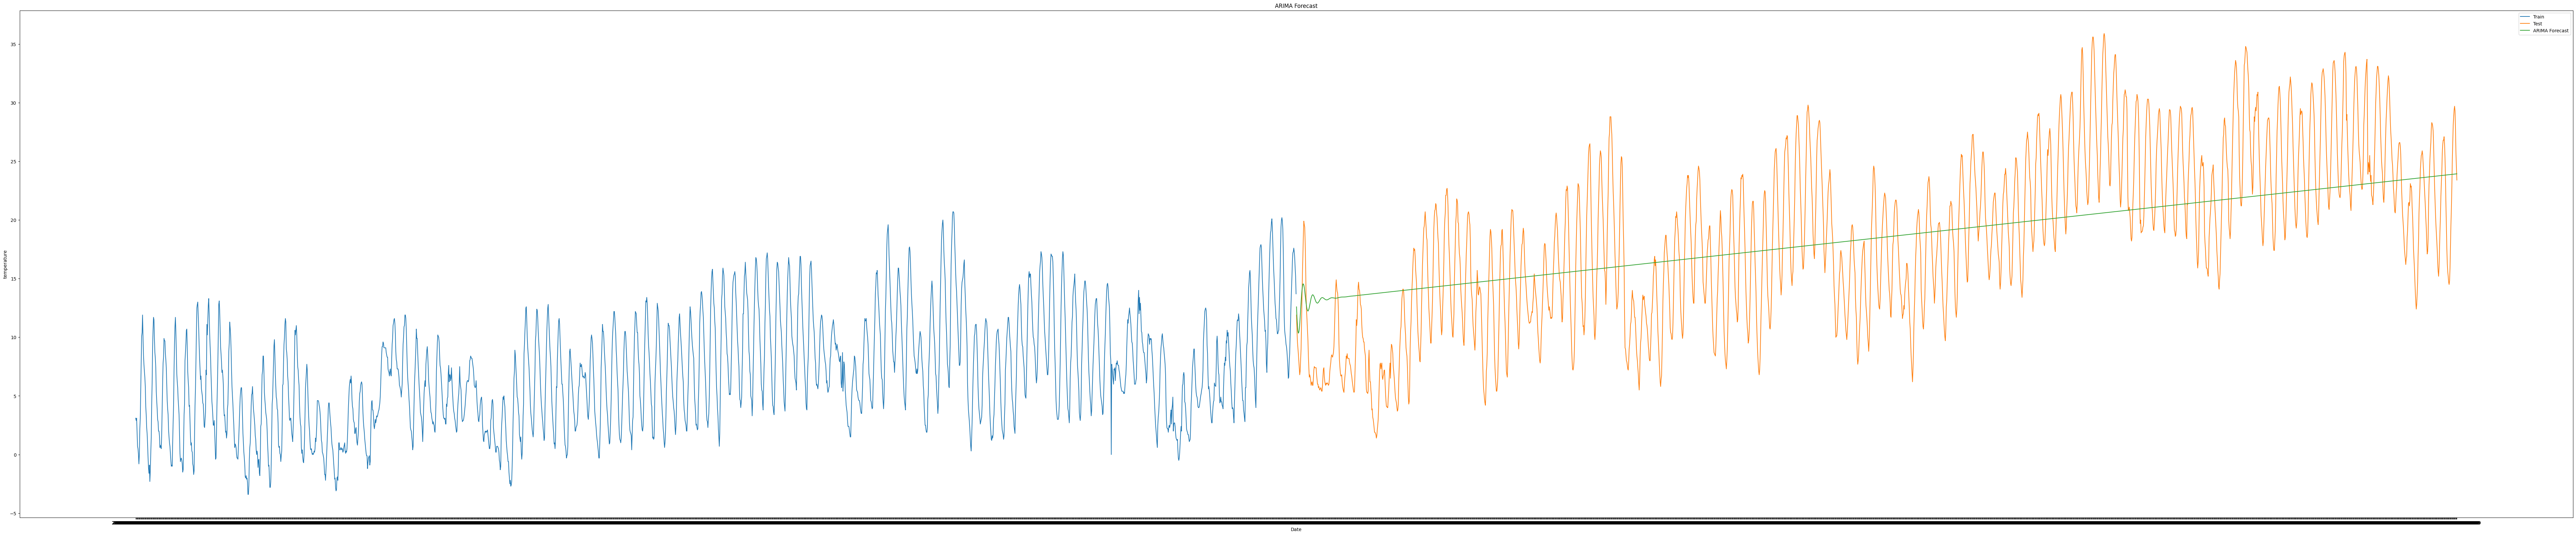

In [19]:
plt.figure(figsize=(100, 20))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index,predicted_mean, label='ARIMA Forecast')
# plt.fill_between(forecast.conf_int().index,
#                  forecast.conf_int().iloc[:, 0],
#                  forecast.conf_int().iloc[:, 1], color='k', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('temperature')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# **QLSTM MODEL**

In [20]:
ARIMA_Result =  pd.DataFrame(columns=['raw', 'predicted','residuals'])
ARIMA_Result['raw'] = test_data['temperature'].copy()
ARIMA_Result['predicted'] = predicted_mean.to_numpy()
ARIMA_Result['residuals'] = ARIMA_Result['raw'] - ARIMA_Result['predicted']
std_residuals = ARIMA_Result['residuals'].std()
ARIMA_Result['std_residuals'] = ARIMA_Result['residuals'] / std_residuals
ARIMA_Result['nxt_target'] = ARIMA_Result['residuals'].shift(-1)
ARIMA_Result['nxt_target'][len(ARIMA_Result)-1] = ARIMA_Result['nxt_target'][len(ARIMA_Result)-2]
ARIMA_Result

/tmp/ipykernel_14963/3789583851.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ARIMA_Result['nxt_target'][len(ARIMA_Result)-1] = ARIMA_Result['nxt_target'][len(ARIMA_Result)-2]
/tmp/ipykernel_14963/3789583851.py:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ARIMA_Result['nxt_target'][len(ARIMA_Result)-1] = ARIMA_Result['nxt_target'][len(ARIMA_Result)-2]


raw  predicted  residuals  std_residuals  nxt_target
time                                                                      
2019-04-17 00:59:59  11.9  12.594381  -0.694381      -0.126045   -1.095846
2019-04-17 01:59:59  10.6  11.695846  -1.095846      -0.198920   -1.446938
2019-04-17 02:59:59   9.6  11.046938  -1.446938      -0.262650   -1.439594
2019-04-17 03:59:59   9.1  10.539594  -1.439594      -0.261317   -1.747066
2019-04-17 04:59:59   8.6  10.347066  -1.747066      -0.317130   -2.421588
...                   ...        ...        ...            ...         ...
2019-07-31 19:59:59  29.3  23.917883   5.382117       0.976969    3.777811
2019-07-31 20:59:59  27.7  23.922189   3.777811       0.685754    1.773506
2019-07-31 21:59:59  25.7  23.926494   1.773506       0.321929    0.569200
2019-07-31 22:59:59  24.5  23.930800   0.569200       0.103322   -0.535105
2019-07-31 23:59:59  23.4  23.935105  -0.535105      -0.097133   -0.535105

[2544 rows x 5 columns]

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
from torch import Tensor
from torch.nn import Parameter
import torch.utils.data as Data
from torch.utils.data import RandomSampler
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error
import pennylane as qml
import pytorch_lightning as pl
import math
import time

In [22]:
def data_process(data, window_size, predict_size):
    scaler1 = StandardScaler()
    scaler2 = StandardScaler()
    d_y = scaler1.fit_transform(data.iloc[:,-1:]) 
    data = scaler2.fit_transform(data.iloc[:,:1])

    data_in = []
    data_out = []
    # range(window_size,len(data)-predict_size+1) range(data.shape[0] - window_size - predict_size + 1)
    for i in range(window_size,len(data)-predict_size+1):
        data_in.append(data[i-window_size:i,0:data.shape[0]])
        data_out.append(d_y[i + predict_size - 1:i + predict_size,0])

    data_in = np.array(data_in)
    data_out = np.array(data_out)

    data_process = {'datain': data_in, 'dataout': data_out}

    return data_process, scaler1 , scaler2

In [23]:
from numpy.random import default_rng
from qiskit_algorithms.utils import algorithm_globals
qubits = 2
seed = 42
np.random.seed(seed)
torch.manual_seed(42)
rng = default_rng(seed)
algorithm_globals.random_seed = seed
features_size = 1
#window_size = features_size * 3
window_size = 10
predict_size = 1

In [24]:
size = int(len(ARIMA_Result) * 0.5)

train = ARIMA_Result[['residuals','nxt_target']][:size].copy()
test = ARIMA_Result[['residuals','nxt_target']][size:].copy()

In [25]:
train_processed, train_target_scalar, train_scaler = data_process(train, window_size, predict_size)
X_train, y_train = train_processed['datain'], train_processed['dataout']

test_processed, test_target_scalar, test_scaler = data_process(test, window_size, predict_size)
X_test, y_test = test_processed['datain'], test_processed['dataout']

In [26]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [27]:
class QLSTM(nn.Module):
    def __init__(self,
                input_size,
                hidden_size,
                n_qubits=4,
                n_qlayers=1,
                batch_first=True,
                return_sequences=False,
                return_state=False,
                backend="default.qubit"):
        super(QLSTM, self).__init__()
        self.n_inputs = input_size
        self.hidden_size = hidden_size
        self.concat_size = self.n_inputs + self.hidden_size
        self.n_qubits = n_qubits
        self.n_qlayers = n_qlayers
        self.backend = backend  # "default.qubit", "qiskit.basicaer", "qiskit.ibm"

        self.batch_first = batch_first
        self.return_sequences = return_sequences
        self.return_state = return_state

        #self.dev = qml.device("default.qubit", wires=self.n_qubits)
        #self.dev = qml.device('qiskit.basicaer', wires=self.n_qubits)
        #self.dev = qml.device('qiskit.ibm', wires=self.n_qubits)
        # use 'qiskit.ibmq' instead to run on hardware

        self.wires_forget = [f"wire_forget_{i}" for i in range(self.n_qubits)]
        self.wires_input = [f"wire_input_{i}" for i in range(self.n_qubits)]
        self.wires_update = [f"wire_update_{i}" for i in range(self.n_qubits)]
        self.wires_output = [f"wire_output_{i}" for i in range(self.n_qubits)]

        self.dev_forget = qml.device(self.backend, wires=self.wires_forget)
        self.dev_input = qml.device(self.backend, wires=self.wires_input)
        self.dev_update = qml.device(self.backend, wires=self.wires_update)
        self.dev_output = qml.device(self.backend, wires=self.wires_output)

        def _circuit_forget(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_forget)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_forget)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_forget]
        self.qlayer_forget = qml.QNode(_circuit_forget, self.dev_forget, interface="torch")

        def _circuit_input(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_input)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_input)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_input]
        self.qlayer_input = qml.QNode(_circuit_input, self.dev_input, interface="torch")

        def _circuit_update(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_update)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_update)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_update]
        self.qlayer_update = qml.QNode(_circuit_update, self.dev_update, interface="torch")

        def _circuit_output(inputs, weights):
            qml.templates.AngleEmbedding(inputs, wires=self.wires_output)
            qml.templates.BasicEntanglerLayers(weights, wires=self.wires_output)
            return [qml.expval(qml.PauliZ(wires=w)) for w in self.wires_output]
        self.qlayer_output = qml.QNode(_circuit_output, self.dev_output, interface="torch")

        weight_shapes = {"weights": (n_qlayers, n_qubits)}
        print(f"weight_shapes = (n_qlayers, n_qubits) = ({n_qlayers}, {n_qubits})")

        self.clayer_in = torch.nn.Linear(self.concat_size, n_qubits)
        self.VQC = {
            'forget': qml.qnn.TorchLayer(self.qlayer_forget, weight_shapes),
            'input': qml.qnn.TorchLayer(self.qlayer_input, weight_shapes),
            'update': qml.qnn.TorchLayer(self.qlayer_update, weight_shapes),
            'output': qml.qnn.TorchLayer(self.qlayer_output, weight_shapes)
        }
        self.clayer_out = torch.nn.Linear(self.n_qubits, self.hidden_size)
        #self.clayer_out = [torch.nn.Linear(n_qubits, self.hidden_size) for _ in range(4)]

    def forward(self, x, init_states=None):
        '''
        x.shape is (batch_size, seq_length, feature_size)
        recurrent_activation -> sigmoid
        activation -> tanh
        '''
        if self.batch_first is True:
            batch_size, seq_length, features_size = x.size()
        else:
            seq_length, batch_size, features_size = x.size()

        hidden_seq = []
        if init_states is None:
            h_t = torch.zeros(batch_size, self.hidden_size)  # hidden state (output)
            c_t = torch.zeros(batch_size, self.hidden_size)  # cell state
        else:
            # for now we ignore the fact that in PyTorch you can stack multiple RNNs
            # so we take only the first elements of the init_states tuple init_states[0][0], init_states[1][0]
            h_t, c_t = init_states
            h_t = h_t[0]
            c_t = c_t[0]

        for t in range(seq_length):
            # get features from the t-th element in seq, for all entries in the batch
            x_t = x[:, t, :]

            # Concatenate input and hidden state
            v_t = torch.cat((h_t, x_t), dim=1)

            # match qubit dimension
            y_t = self.clayer_in(v_t)

            f_t = torch.sigmoid(self.clayer_out(self.VQC['forget'](y_t)))  # forget block
            i_t = torch.sigmoid(self.clayer_out(self.VQC['input'](y_t)))  # input block
            g_t = torch.tanh(self.clayer_out(self.VQC['update'](y_t)))  # update block
            o_t = torch.sigmoid(self.clayer_out(self.VQC['output'](y_t))) # output block

            c_t = (f_t * c_t) + (i_t * g_t)
            h_t = o_t * torch.tanh(c_t)

            hidden_seq.append(h_t.unsqueeze(0))
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        return hidden_seq, (h_t, c_t)

class QRegressionLSTM(nn.Module):
    def __init__(self, num_sensors, hidden_units, n_qubits=0, n_qlayers=1):
        super().__init__()
        self.num_sensors = num_sensors  # this is the number of features
        self.hidden_units = hidden_units
        self.num_layers = 1

        self.lstm = QLSTM(
            input_size=num_sensors,
            hidden_size=hidden_units,
            batch_first=True,
            n_qubits = n_qubits,
            n_qlayers= n_qlayers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()

        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn).flatten()  # First dim of Hn is num_layers, which is set to 1 above.

        return out

In [28]:
batch_size = 4
learning_rate = 0.004
num_epochs = 5
trainDataloader = DataLoader(TensorDataset(X_train, y_train), batch_size = batch_size, shuffle = False)
testDataloader = DataLoader(TensorDataset(X_test,y_test), batch_size = batch_size, shuffle = False)
device = "cpu"
modelQ = QRegressionLSTM(num_sensors=1, hidden_units= 6, n_qubits=1)
criterion = nn.MSELoss()
optimizerQ = torch.optim.Adam(modelQ.parameters(), lr = learning_rate, betas = (0.0, 0.9))

weight_shapes = (n_qlayers, n_qubits) = (1, 1)


In [29]:
histQ = np.zeros(num_epochs)
histQacc = np.zeros(num_epochs)

count = 0
for epoch in range(num_epochs):
    loss_Q = []
    rmse_q = []
    correct = 0
    batches = 0
    for (x, y) in trainDataloader:
        modelQ.zero_grad()
        x = x.to(device)
        y = y.to(device)
        output = modelQ(x)

        label = y.squeeze(1)
        #print(output)
        #print(label)
        lossQ = criterion(output, label)
        lossQ.backward()
        optimizerQ.step()
        
        #correct += (output == label).float().sum()
        #batches +=1
        
        loss_Q.append(lossQ.item())
    histQ[epoch] = np.sum(loss_Q)
    
    #print(correct)
    #histQacc[epoch] = correct/batches
    print(f'[{epoch+1}/{num_epochs}]  LossQ:{np.sum(loss_Q)}')

[1/5]  LossQ:259.6614541178569
[2/5]  LossQ:106.76359636615962
[3/5]  LossQ:70.11150853079744
[4/5]  LossQ:68.07836452568881
[5/5]  LossQ:73.33128806459717


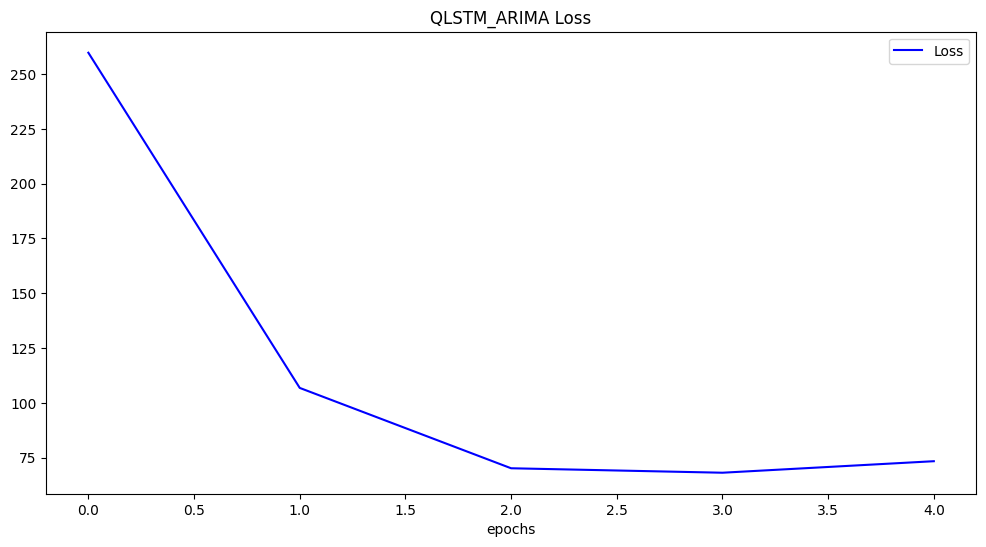

In [30]:
np.savetxt('./SavedModels/Weather/Madrid/loss/arima_qlstm.txt',histQ)
plt.figure(figsize = (12, 6))
plt.plot(histQ, color = 'blue', label = 'Loss')
plt.title('QLSTM_ARIMA Loss')
plt.xlabel('epochs')
plt.legend(loc = 'upper right')

In [31]:
histQ1 = histQ 

In [32]:
def predict(data_loader, model):
    """Just like `test_loop` function but keep track of the outputs instead of the loss
    function.
    """
    output = torch.tensor([])
    model.eval()
    with torch.no_grad():
        for X, _ in data_loader:
            y_star = model(X)
            output = torch.cat((output, y_star), 0)


    return output

In [33]:
pred_y_train = modelQ(X_train)
pred_y_test = modelQ(X_test)

print(pred_y_train)

tensor([-0.5612, -0.5584, -0.5189,  ...,  1.0165,  0.6341,  0.2351],
       grad_fn=<ViewBackward0>)


In [34]:
pred_y_train = pred_y_train.reshape(-1, 1)
pred_y_test = pred_y_test.reshape(-1, 1)
pred_y_train

tensor([[-0.5612],
        [-0.5584],
        [-0.5189],
        ...,
        [ 1.0165],
        [ 0.6341],
        [ 0.2351]], grad_fn=<ViewBackward0>)

In [35]:
y_train_true = train_target_scalar.inverse_transform(y_train)
y_train_pred = train_target_scalar.inverse_transform(pred_y_train.cpu().detach().numpy())
y_test_true = test_target_scalar.inverse_transform(y_test)
y_test_pred = test_target_scalar.inverse_transform(pred_y_test.cpu().detach().numpy())

In [36]:
np.savetxt('./SavedModels/Weather/Madrid/train/arima_qlstm.txt',y_train_pred)
np.savetxt('./SavedModels/Weather/Madrid/test/arima_qlstm.txt',y_test_pred)

Training dataset MSE: 6.554063128201067 RMSE:2.5600904531287694


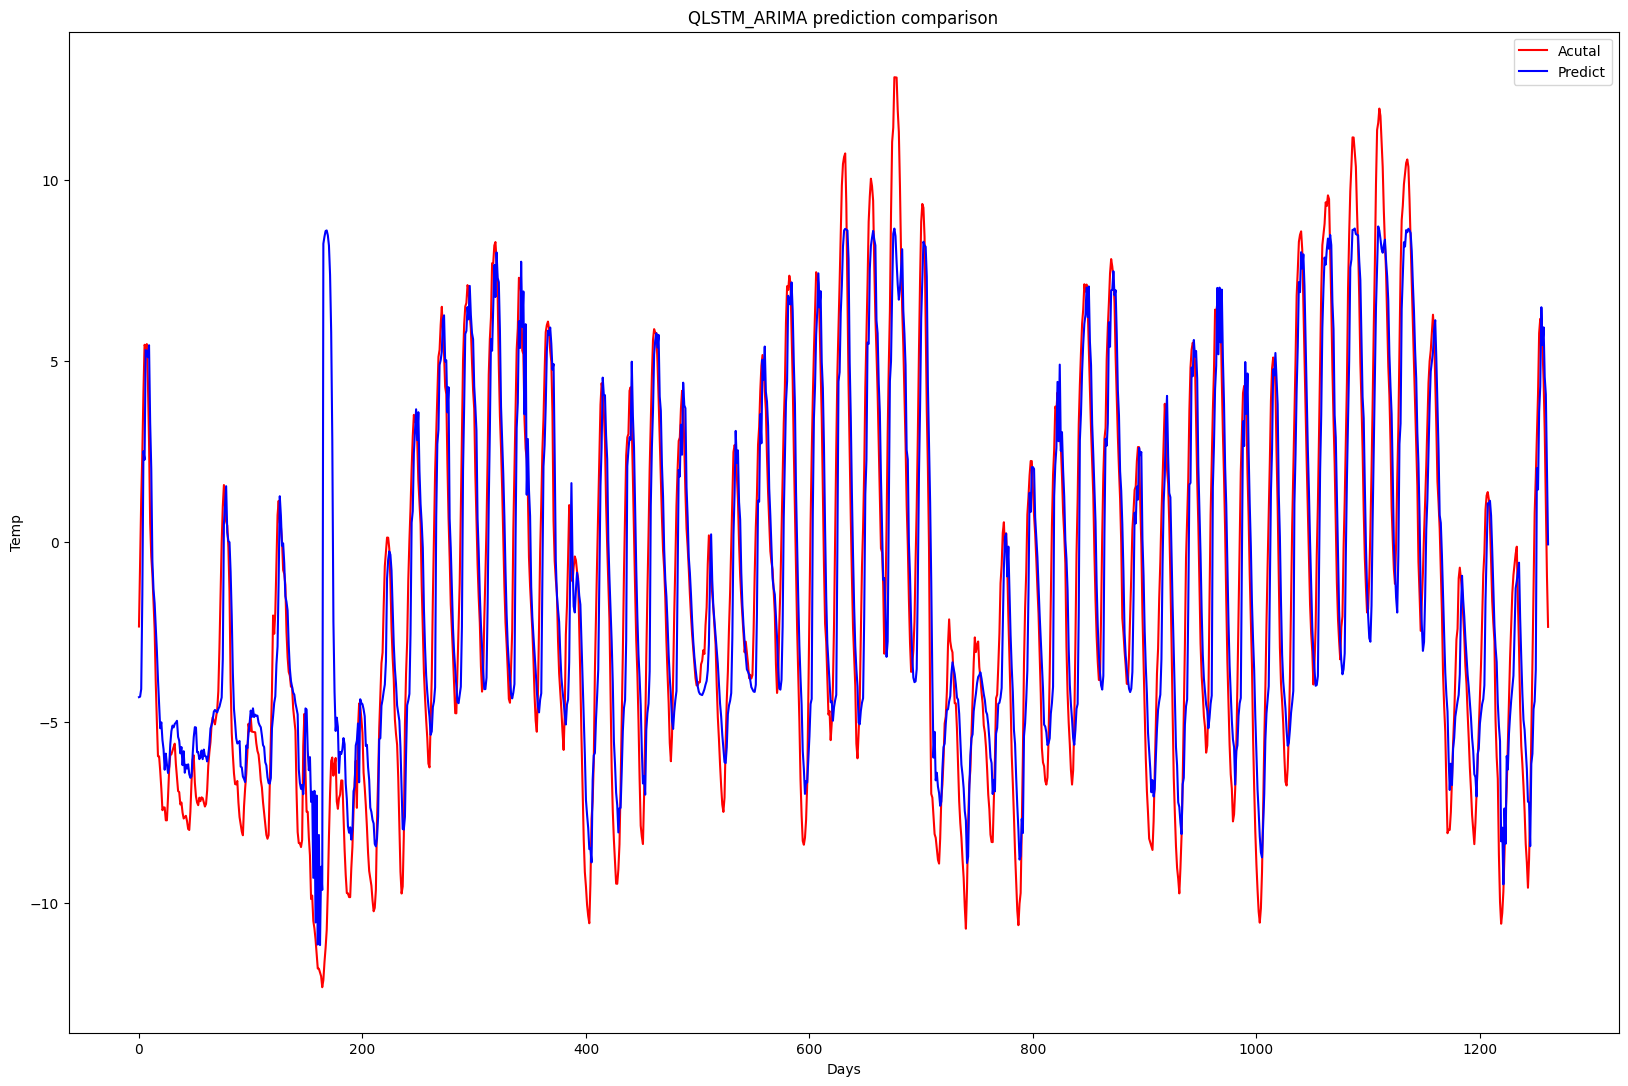

In [37]:
plt.figure(figsize=(20, 13))
plt.plot(y_train_true, color = 'red', label = 'Acutal')
plt.plot(y_train_pred, color = 'blue', label = 'Predict')
plt.title('QLSTM_ARIMA prediction comparison')
plt.ylabel('Temp')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_train_true, y_train_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset MSE: {MSE} RMSE:{RMSE}')

Training dataset MSE:6.55795290568373 RMSE:2.5608500357661965


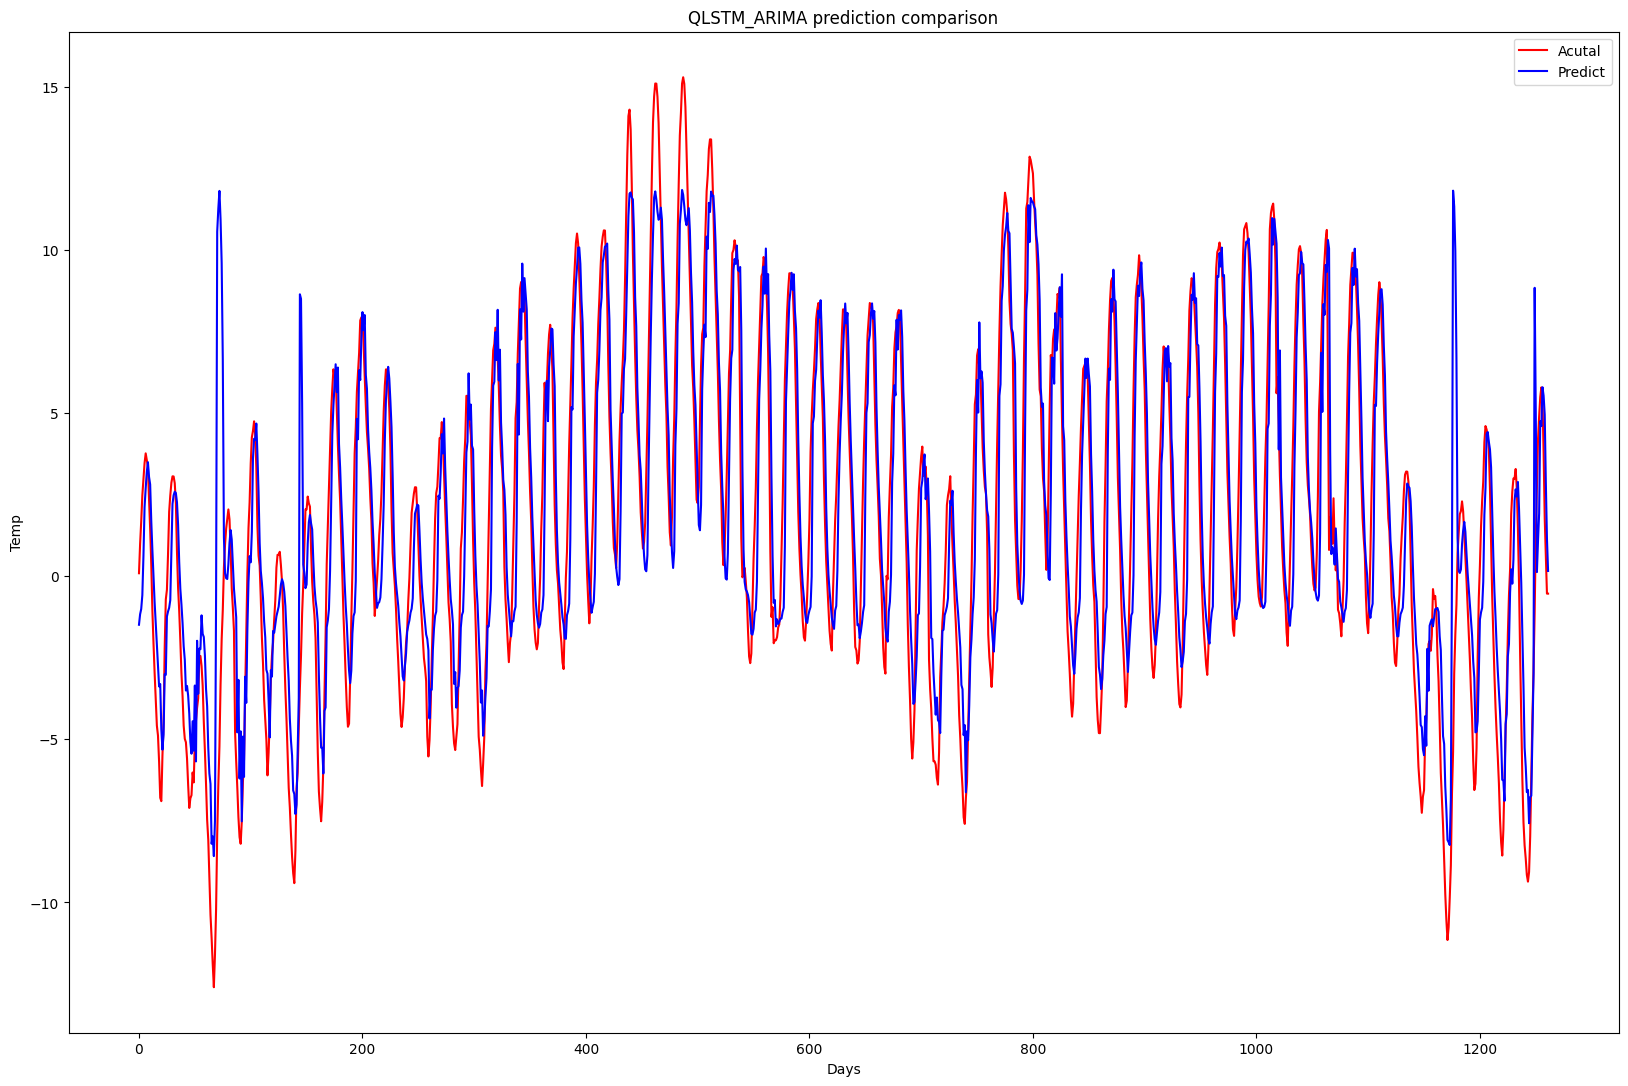

In [38]:
plt.figure(figsize=(20, 13))
plt.plot(y_test_true, color = 'red', label = 'Acutal')
plt.plot(y_test_pred, color = 'blue', label = 'Predict')
plt.title('QLSTM_ARIMA prediction comparison')
plt.ylabel('Temp')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_test_true, y_test_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset MSE:{MSE} RMSE:{RMSE}')

In [39]:
final_result_qlstm = ARIMA_Result['predicted'][size+window_size:].values + y_test_pred.squeeze(1)

In [40]:
frq = ARIMA_Result[['predicted','raw']][size+window_size:].copy()
frq['final'] = final_result_qlstm
frq

predicted   raw      final
time                                           
2019-06-09 10:59:59  18.505825  17.4  17.017193
2019-06-09 11:59:59  18.510131  18.6  17.342017
2019-06-09 12:59:59  18.514436  19.5  17.509049
2019-06-09 13:59:59  18.518742  20.2  17.938650
2019-06-09 14:59:59  18.523047  21.0  19.148310
...                        ...   ...        ...
2019-07-31 19:59:59  23.917883  29.3  29.449404
2019-07-31 20:59:59  23.922189  27.7  28.869808
2019-07-31 21:59:59  23.926494  25.7  26.782631
2019-07-31 22:59:59  23.930800  24.5  25.075041
2019-07-31 23:59:59  23.935105  23.4  24.095405

[1262 rows x 3 columns]

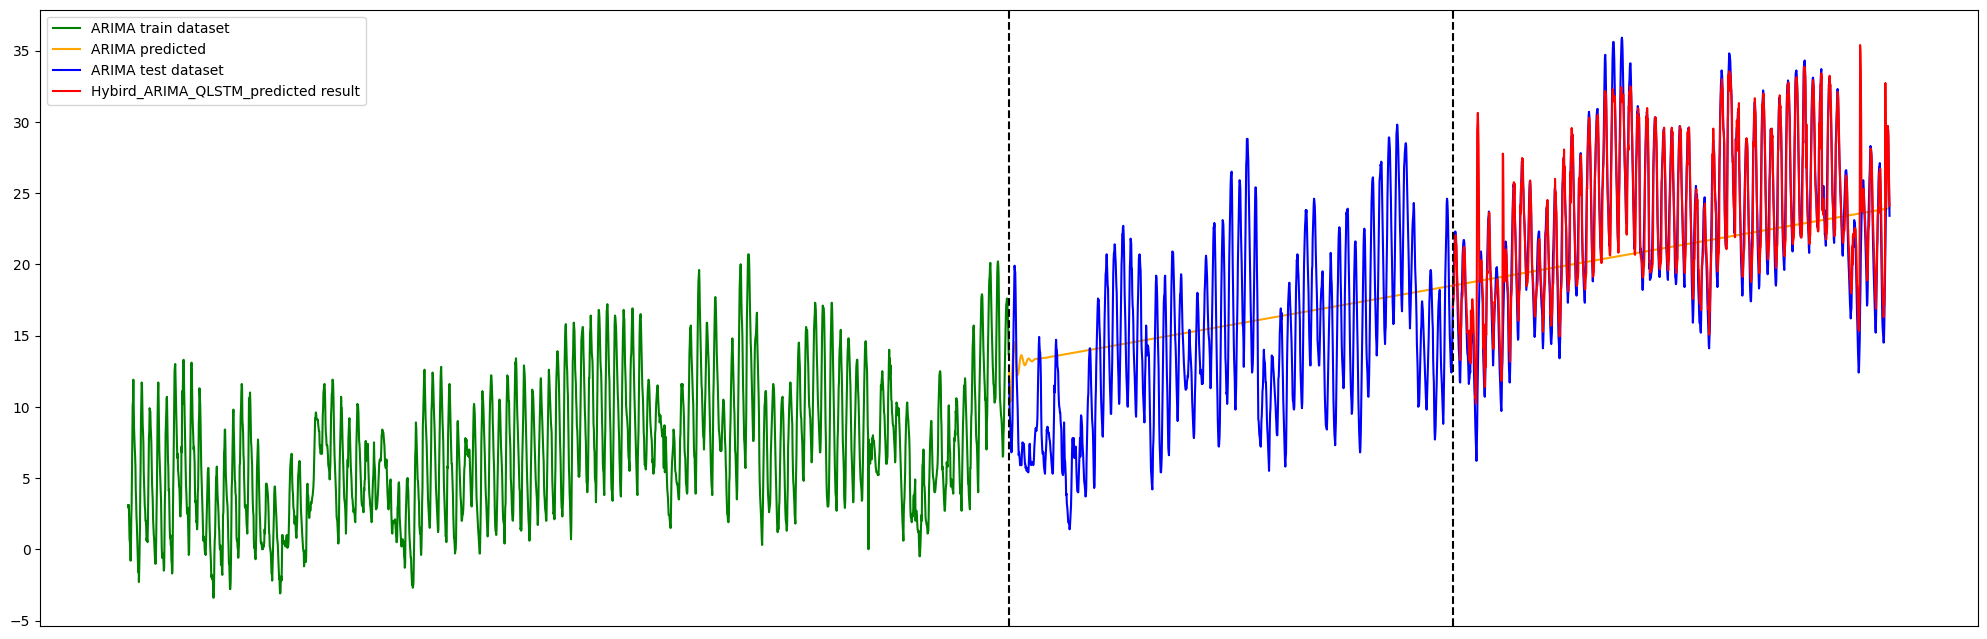

In [41]:
plt.figure(figsize=(25,8))
plt.plot(train_data['temperature'], label ='ARIMA train dataset', color='green')
plt.plot(ARIMA_Result['predicted'], label ='ARIMA predicted', color='orange')
plt.plot(ARIMA_Result['raw'], label = "ARIMA test dataset", color ='blue')
plt.plot(frq['final'], label = 'Hybird_ARIMA_QLSTM_predicted result', color='red')
plt.axvline(x=len(train_data['temperature']), c='black', linestyle='--')
plt.axvline(x=len(train_data['temperature']) + len(ARIMA_Result['predicted']) - len(frq['final']), c='black', linestyle='--')
plt.gca().set_xticks([])
plt.plot()
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(final_result_qlstm,ARIMA_Result['raw'][size+window_size:].values )    
mae = mean_absolute_error(final_result_qlstm, ARIMA_Result['raw'][size+window_size:].values)
rmse = np.sqrt(mse)

print(f'X_test MSE: {mse}')
print(f'X_test MAE: {mae}')
print(f'X_test RMSE: {rmse}')

X_test MSE: 4.428268897484403
X_test MAE: 1.215443815944952
X_test RMSE: 2.1043452419896322


In [43]:
torch.save(modelQ.state_dict(),'./SavedModels/Weather/Madrid/model/arima_QLSTM_sd')

# **LSTM MODEL**

In [44]:
class ShallowRegressionLSTM(nn.Module):
    def __init__(self, num_sensors, hidden_units):
        super().__init__()
        self.num_sensors = num_sensors  # this is the number of features
        self.hidden_units = hidden_units
        self.num_layers = 1

        self.lstm = nn.LSTM(
            input_size=num_sensors,
            hidden_size=hidden_units,
            batch_first=True,
            num_layers=self.num_layers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()

        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn[0]).flatten()  # First dim of Hn is num_layers, which is set to 1 above.

        return out

In [45]:
batch_size = 4
learning_rate = 0.004
num_epochs = 5
trainDataloader = DataLoader(TensorDataset(X_train, y_train), batch_size = batch_size, shuffle = False)
testDataloader = DataLoader(TensorDataset(X_test,y_test), batch_size = batch_size, shuffle = False)
device = "cpu"
modelQ = ShallowRegressionLSTM(num_sensors=1, hidden_units=6)
criterion = nn.MSELoss()
optimizerQ = torch.optim.Adam(modelQ.parameters(), lr = learning_rate, betas = (0.0, 0.9))

In [46]:
histQ = np.zeros(num_epochs)
histQacc = np.zeros(num_epochs)

count = 0
for epoch in range(num_epochs):
    loss_Q = []
    rmse_q = []
    correct = 0
    batches = 0
    for (x, y) in trainDataloader:
        modelQ.zero_grad()
        x = x.to(device)
        y = y.to(device)
        output = modelQ(x)

        label = y.squeeze(1)
        #print(output)
        #print(label)
        lossQ = criterion(output, label)
        lossQ.backward()
        optimizerQ.step()
        
        #correct += (output == label).float().sum()
        #batches +=1
        
        loss_Q.append(lossQ.item())
    histQ[epoch] = np.sum(loss_Q)
    
    #print(correct)
    #histQacc[epoch] = correct/batches
    print(f'[{epoch+1}/{num_epochs}]  LossQ:{np.sum(loss_Q)} ')

[1/5]  LossQ:128.42174855130725 
[2/5]  LossQ:27.885657828650437 
[3/5]  LossQ:17.667363900516648 
[4/5]  LossQ:14.790549389901571 
[5/5]  LossQ:13.90554221055936 


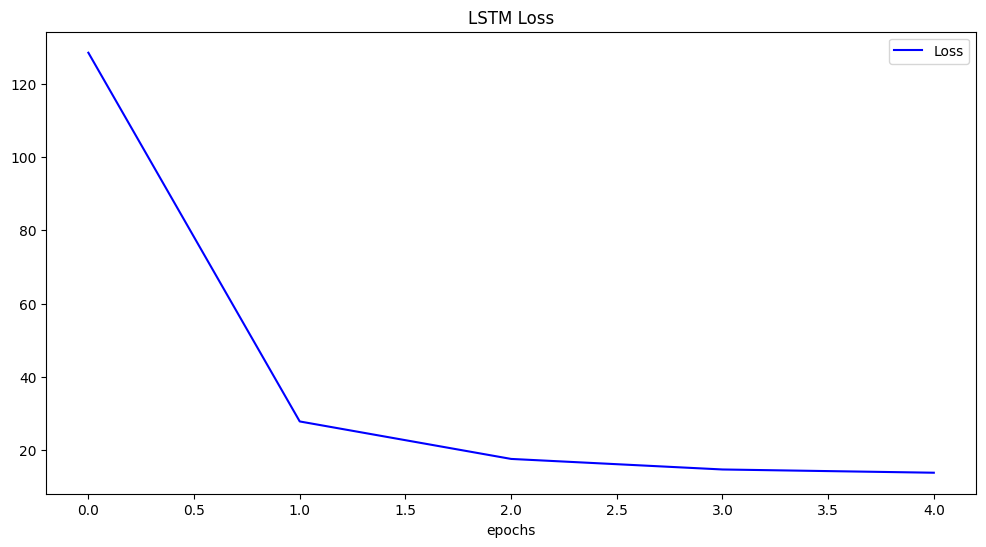

In [47]:
np.savetxt('./SavedModels/Weather/Madrid/loss/arima_lstm.txt',histQ)
plt.figure(figsize = (12, 6))
plt.plot(histQ, color = 'blue', label = 'Loss')
plt.title('LSTM Loss')
plt.xlabel('epochs')
plt.legend(loc = 'upper right')

In [48]:
pred_y_train = modelQ(X_train)
pred_y_test = modelQ(X_test)
pred_y_train = pred_y_train.reshape(-1, 1)
pred_y_test = pred_y_test.reshape(-1, 1)

In [49]:
y_train_true = train_target_scalar.inverse_transform(y_train)
y_train_pred = train_target_scalar.inverse_transform(pred_y_train.cpu().detach().numpy())
y_test_true = test_target_scalar.inverse_transform(y_test)
y_test_pred = test_target_scalar.inverse_transform(pred_y_test.cpu().detach().numpy())

In [50]:
np.savetxt('./SavedModels/Weather/Madrid/train/arima_lstm.txt',y_train_pred)
np.savetxt('./SavedModels/Weather/Madrid/test/arima_lstm.txt',y_test_pred)

Training dataset MSE: 2.448315012200276 RMSE:1.5647092420639293


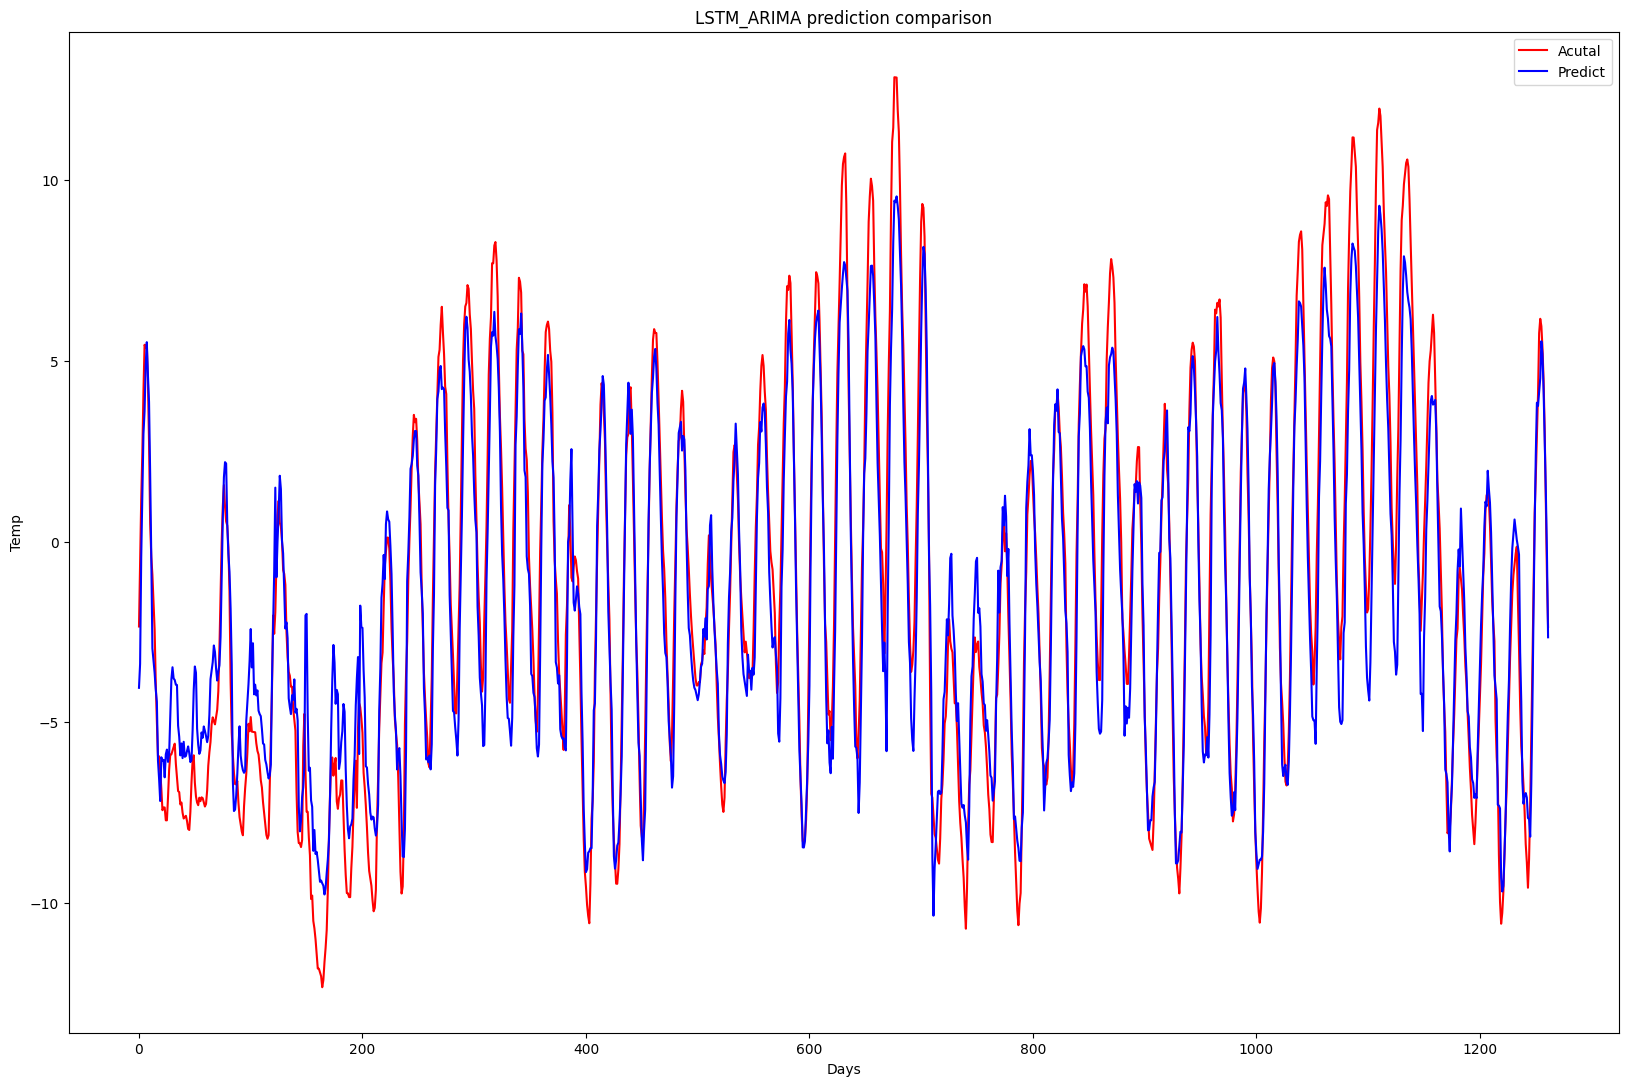

In [51]:
plt.figure(figsize=(20, 13))
plt.plot(y_train_true, color = 'red', label = 'Acutal')
plt.plot(y_train_pred, color = 'blue', label = 'Predict')
plt.title('LSTM_ARIMA prediction comparison')
plt.ylabel('Temp')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_train_true, y_train_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset MSE: {MSE} RMSE:{RMSE}')

Training dataset RMSE:1.5275942372950806


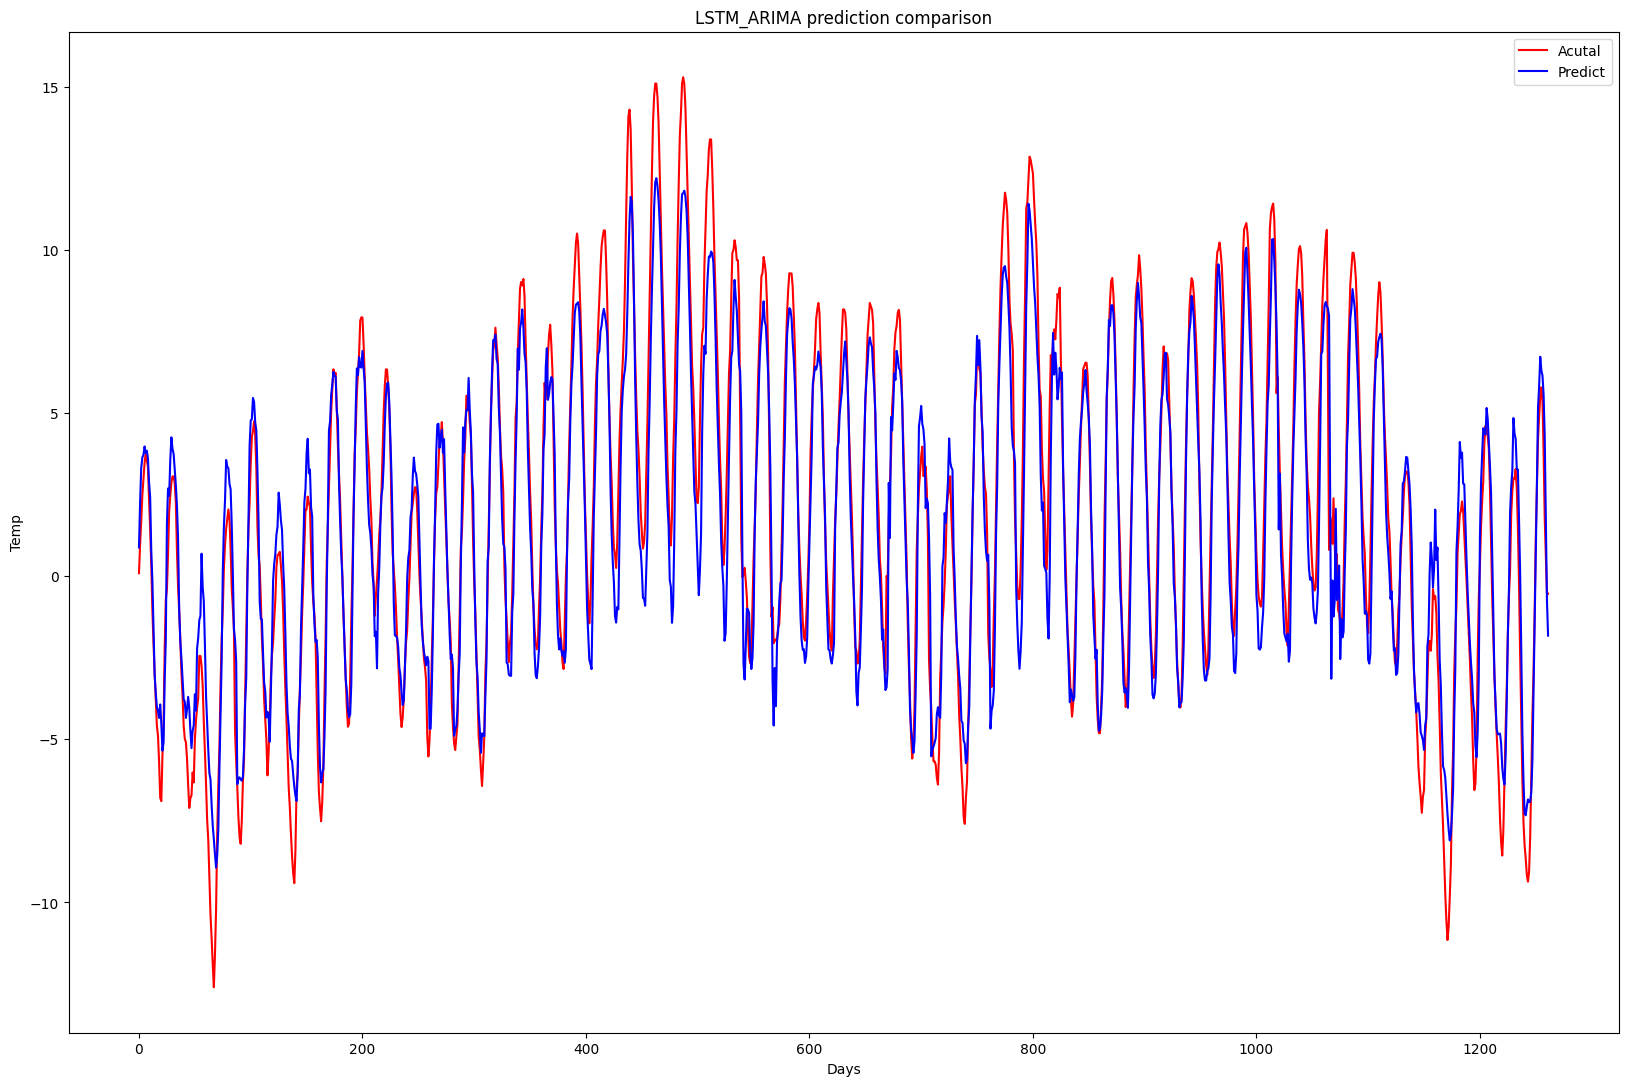

In [52]:
plt.figure(figsize=(20, 13))
plt.plot(y_test_true, color = 'red', label = 'Acutal')
plt.plot(y_test_pred, color = 'blue', label = 'Predict')
plt.title('LSTM_ARIMA prediction comparison')
plt.ylabel('Temp')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_test_true, y_test_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')

In [53]:
final_result= ARIMA_Result['predicted'][size+window_size:].values + y_test_pred.squeeze(1)

In [54]:
fr = ARIMA_Result[['predicted','raw']][size+window_size:].copy()
fr['final'] = final_result
fr

predicted   raw      final
time                                           
2019-06-09 10:59:59  18.505825  17.4  19.385002
2019-06-09 11:59:59  18.510131  18.6  20.773481
2019-06-09 12:59:59  18.514436  19.5  21.830927
2019-06-09 13:59:59  18.518742  20.2  22.156852
2019-06-09 14:59:59  18.523047  21.0  22.240920
...                        ...   ...        ...
2019-07-31 19:59:59  23.917883  29.3  29.477597
2019-07-31 20:59:59  23.922189  27.7  28.193449
2019-07-31 21:59:59  23.926494  25.7  25.608312
2019-07-31 22:59:59  23.930800  24.5  23.185934
2019-07-31 23:59:59  23.935105  23.4  22.113711

[1262 rows x 3 columns]

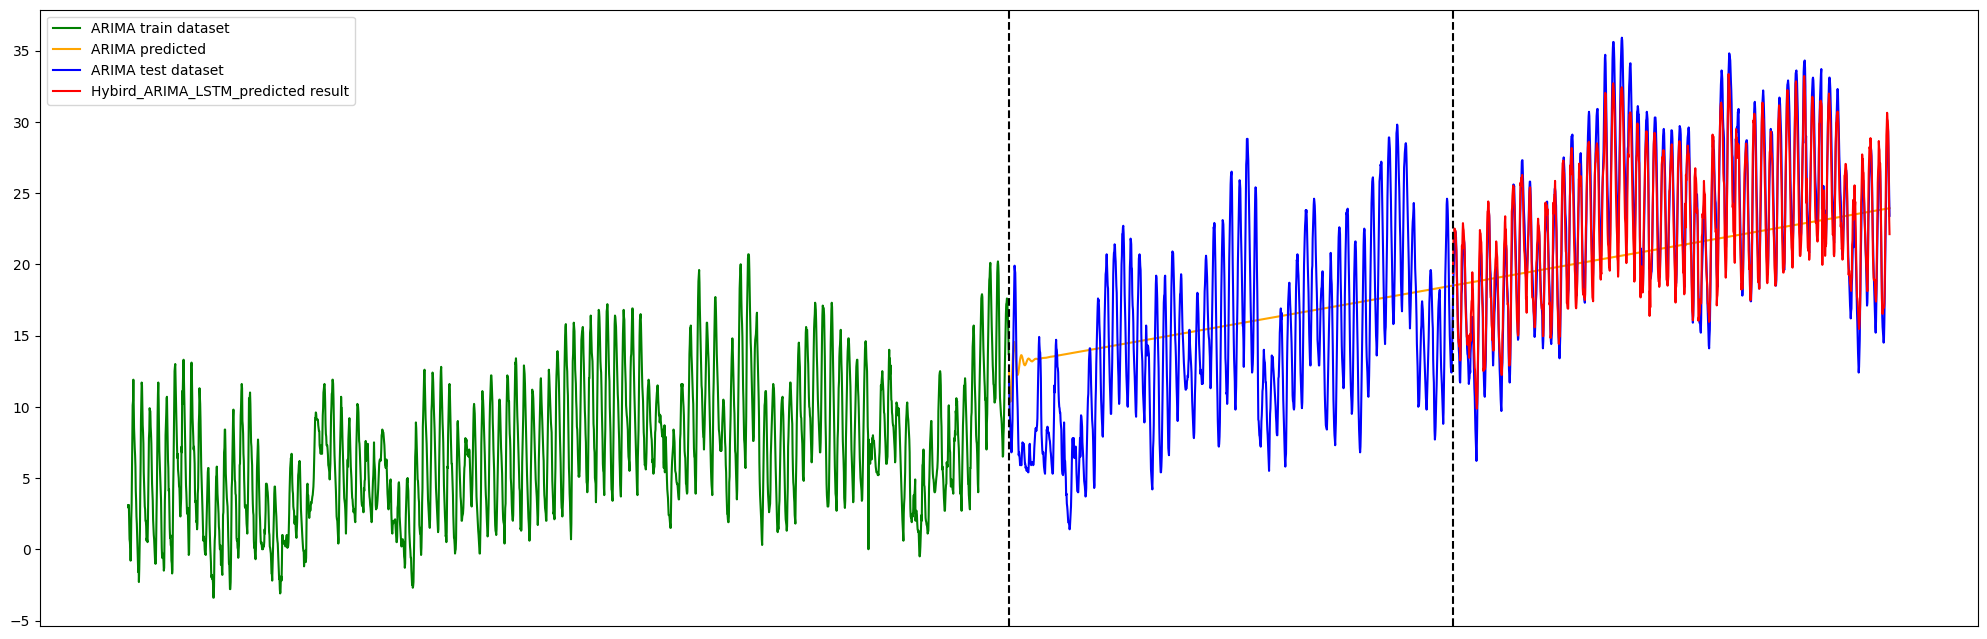

In [55]:
plt.figure(figsize=(25,8))
plt.plot(train_data['temperature'], label ='ARIMA train dataset', color='green')
plt.plot(ARIMA_Result['predicted'], label ='ARIMA predicted', color='orange')
plt.plot(ARIMA_Result['raw'], label = "ARIMA test dataset", color ='blue')
plt.plot(fr['final'], label = 'Hybird_ARIMA_LSTM_predicted result', color='red')
plt.axvline(x=len(train_data['temperature']), c='black', linestyle='--')
plt.axvline(x=len(train_data['temperature']) + len(ARIMA_Result['predicted']) - len(frq['final']), c='black', linestyle='--')
plt.gca().set_xticks([])
plt.plot()
plt.legend()
plt.show()

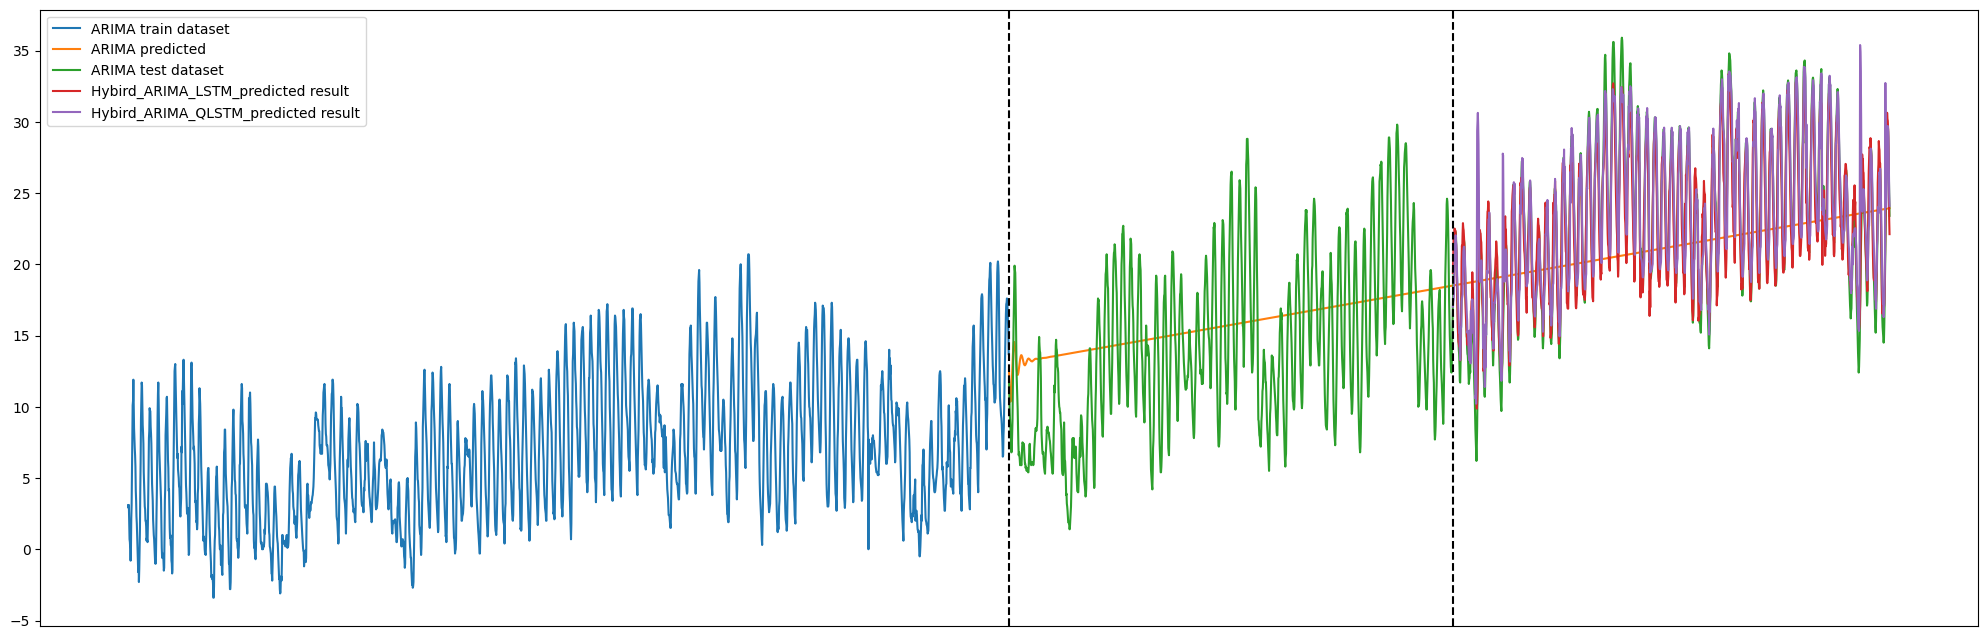

In [56]:
plt.figure(figsize=(25,8))
plt.plot(train_data['temperature'], label ='ARIMA train dataset')
plt.plot(ARIMA_Result['predicted'], label ='ARIMA predicted')
plt.plot(ARIMA_Result['raw'], label = "ARIMA test dataset")
plt.plot(fr['final'], label = 'Hybird_ARIMA_LSTM_predicted result')
plt.plot(frq['final'], label = 'Hybird_ARIMA_QLSTM_predicted result')
plt.axvline(x=len(train_data['temperature']), c='black', linestyle='--')
plt.axvline(x=len(train_data['temperature']) + len(ARIMA_Result['predicted']) - len(frq['final']), c='black', linestyle='--')
plt.gca().set_xticks([])
plt.plot()
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(final_result,ARIMA_Result['raw'][size+window_size:].values )    
mae = mean_absolute_error(final_result, ARIMA_Result['raw'][size+window_size:].values)
rmse = np.sqrt(mse)

print(f'X_test MSE: {mse}')
print(f'X_test MAE: {mae}')
print(f'X_test RMSE: {rmse}')

X_test MSE: 2.471604648808844
X_test MAE: 1.3128607257438352
X_test RMSE: 1.5721337884572177


In [58]:
torch.save(modelQ,'./SavedModels/Weather/Madrid/model/arima_lstm')

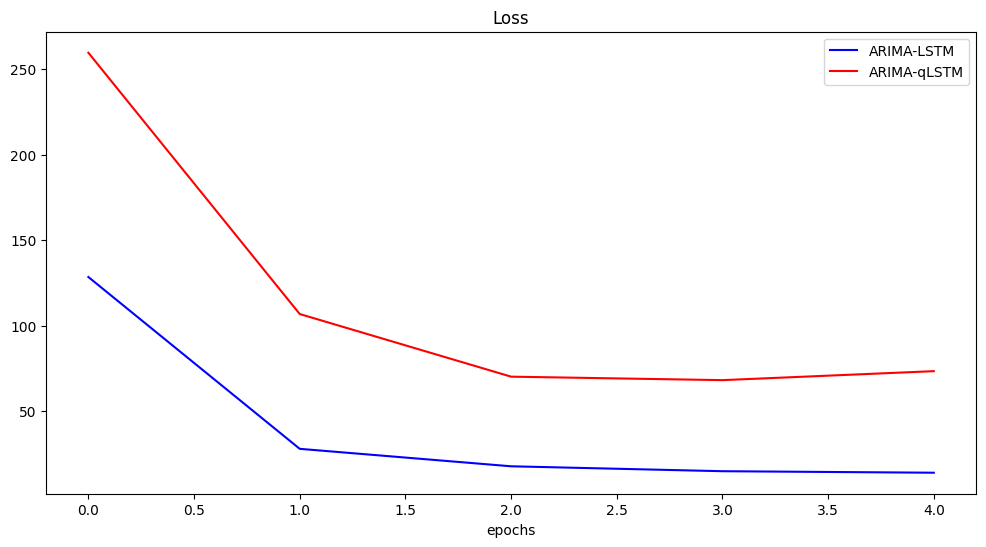

In [59]:
plt.figure(figsize = (12, 6))
plt.plot(histQ, color = 'blue', label = 'ARIMA-LSTM')
plt.plot(histQ1, color='red', label='ARIMA-qLSTM')
plt.title('Loss')
plt.xlabel('epochs')
plt.legend(loc = 'upper right')